<a href="https://colab.research.google.com/github/Thuoq/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow-2nd-Edition/blob/main/Chapter_12_Custom_Models_and_Training_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 12. Custom Models and Training with TensorFlow

Dưới đây là hình ảnh của **Tensorflow API** 
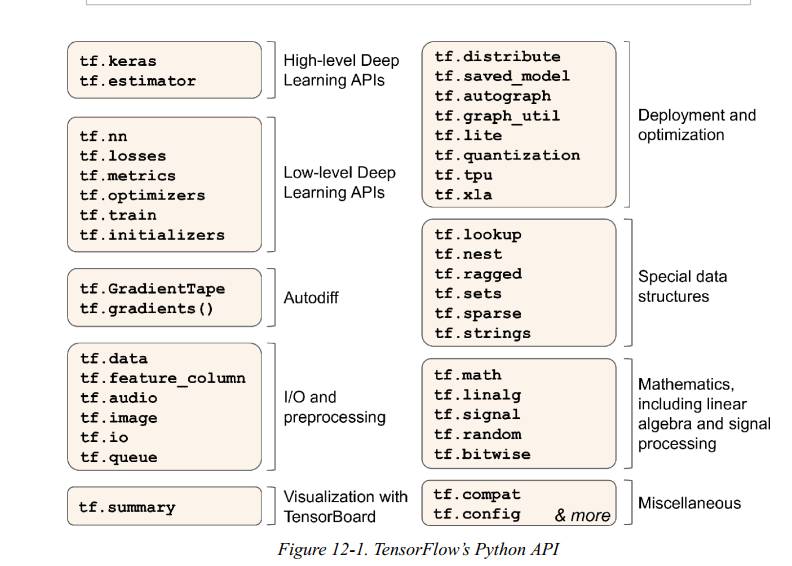


## Using TensorFlow like Numpy

TensorFlow's API xoay quanh các tensor, nó sẽ flow từ các operator này sang các operator khác thì nó gọi là Tensorflow khác.  1 Tensor thừng là multidimention aray nhu ndarray, nó cũng dữ scalar. Nó sẽ rất quan trọng khi chúng ta tạo custom cost functions, custom metríc, custom layers, và nhiều hơn và chúng ta sẽ nhìn làm sao chúng ta tạo và manipulate chúng. 


### Tensor and Operators 

In [3]:
#import libraries
import tensorflow as tf
from tensorflow import keras

Tạo 1 tensor bởi `tf.constant()`

In [5]:
tf.constant([
             [1.,2.,3.],
             [4.,5.,6.]
]) # matrix

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [6]:
tf.constant(42) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

Như ndarray , a tf.Tensor có 1 shape và datatype (**dtype**)

In [9]:
t = tf.constant([
                 [1.,2.,3.],
                 [4.,5.,6.]
])

In [10]:
t.shape

TensorShape([2, 3])

In [11]:
t.dtype

tf.float32

Indexing workds much like in NumPy

In [15]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [12]:
t[:,1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [13]:
t[...,1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [16]:
t[:,1,tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [17]:
t+10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [18]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [20]:
t @ tf.transpose(t) # like tf.matmul()

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

Nếu bạn muốn viết code được di sang người khác cũng sử dụng Keras, bạn nêu sử dụng Keras fnc. Tuy nhiên chúng chỉ cover 1 số lượng nhỏ tất cả các function

In [22]:
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

### Tensor and Numpy

Tensor rất tốt sử dụng với Numpy, bạn có thể sử dụng 1 tensỏ từ Numpy array. Bạn có thể thuận chí applu Tensorflow tớ numpay và numpy tới tensor

In [23]:
#import numpy 
import numpy as np

In [24]:
a = np.array([2.,4.,5.])

In [25]:
tf.constant(a) # convert to tensor

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [26]:
t.numpy() # convert to np or np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [27]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [28]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

**Note**: NumPy sử dụng 64-bit precision default trong khi Tensorflow sử dung 32-bbit chúng ta nên thay nó 

### Type Conversions 

bạn không thể + float tensor và 1 interger tensor và 32-bit float và 1 bit float

In [30]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: ignored

In [31]:
tf.constant(2.) + tf.constant(40.0,dtype=tf.float64)

InvalidArgumentError: ignored

Để Tránh cái điều trên chúng ta sử dụng `tf.cast` 

In [32]:
t2= tf.constant(40.,dtype=tf.float64)

In [34]:
tf.constant(2.0) + tf.cast(t2,tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Variables 

Tf tenssor chúng ta nhìn trước là immutable , bạn ko thể sửa chuýng.  nếu muốn chỉnh sửa chúng bạnh cần sử dụng thằng `tf.Variable `

In [35]:
v = tf.Variable([
                 [1.,2.,3.],
                 [4.,5.,6.]
])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [36]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [38]:
v[0,1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

### Other Data Structuce 